In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/ADBE_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000
1,3/4/2019,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900
2,3/5/2019,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800
3,3/6/2019,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500
4,3/7/2019,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200
...,...,...,...,...,...,...,...,...
1319,5/28/2024,ADBE,478.429993,478.429993,478.670013,469.600006,473.010010,2575300
1320,5/29/2024,ADBE,477.600006,477.600006,482.790008,472.600006,472.779999,2214800
1321,5/30/2024,ADBE,445.869995,445.869995,466.820007,444.839996,464.899994,5606900
1322,5/31/2024,ADBE,444.760010,444.760010,448.230011,433.970001,447.720001,7487500


In [3]:
data.describe

<bound method NDFrame.describe of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   ADBE  264.010010  264.010010  266.239990  261.500000   
1      3/4/2019   ADBE  258.160004  258.160004  267.000000  254.080002   
2      3/5/2019   ADBE  257.380005  257.380005  259.869995  256.369995   
3      3/6/2019   ADBE  256.399994  256.399994  259.489990  253.839996   
4      3/7/2019   ADBE  255.460007  255.460007  257.489990  253.289993   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   ADBE  478.429993  478.429993  478.670013  469.600006   
1320  5/29/2024   ADBE  477.600006  477.600006  482.790008  472.600006   
1321  5/30/2024   ADBE  445.869995  445.869995  466.820007  444.839996   
1322  5/31/2024   ADBE  444.760010  444.760010  448.230011  433.970001   
1323   6/3/2024   ADBE  439.019989  439.019989  449.839996  436.579987   

            Open   Volume  
0     265.750000  2594000  
1     266.700012  299

In [4]:
data.info

<bound method DataFrame.info of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   ADBE  264.010010  264.010010  266.239990  261.500000   
1      3/4/2019   ADBE  258.160004  258.160004  267.000000  254.080002   
2      3/5/2019   ADBE  257.380005  257.380005  259.869995  256.369995   
3      3/6/2019   ADBE  256.399994  256.399994  259.489990  253.839996   
4      3/7/2019   ADBE  255.460007  255.460007  257.489990  253.289993   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   ADBE  478.429993  478.429993  478.670013  469.600006   
1320  5/29/2024   ADBE  477.600006  477.600006  482.790008  472.600006   
1321  5/30/2024   ADBE  445.869995  445.869995  466.820007  444.839996   
1322  5/31/2024   ADBE  444.760010  444.760010  448.230011  433.970001   
1323   6/3/2024   ADBE  439.019989  439.019989  449.839996  436.579987   

            Open   Volume  
0     265.750000  2594000  
1     266.700012  29949

In [6]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [47]:
# 3. Quá trình Training
# Find the best ARIMA model using auto_arima
import pmdarima as pm
model = pm.auto_arima(train_data, start_p=5, start_q=5,
                      test='adf',      
                      max_p=5, max_q=5,             
                      d=None,         
                      seasonal=False,     
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=6892.788, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6908.843, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6897.088, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6898.606, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6906.875, Time=0.01 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=6890.609, Time=2.22 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=6891.501, Time=2.02 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=6892.916, Time=2.10 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=6904.054, Time=1.70 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=6888.651, Time=1.78 sec
 ARIMA(3,1,5)(0,0,0)[0]             : AIC=6889.528, Time=1.35 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=6890.977, Time=1.66 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=6890.390, Time=1.78 sec
 ARIMA(3,1,4)(0,0,0)[0]             : 

In [49]:
model_fit = pm.ARIMA(order=model.order).fit(y=train_data)

C:\Users\tuleh\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test), typ='levels')


In [50]:
y_pred

926     317.927819
927     319.320911
928     317.839632
929     319.190608
930     318.730300
           ...    
1319    318.831790
1320    318.815735
1321    318.816461
1322    318.830931
1323    318.804842
Length: 398, dtype: float64

In [53]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 179.88050272842875
Testing MAPE: 28.946481150320576
Testing MAE: 151.047472804799


In [54]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
926    317.927819
927    319.320911
928    317.839632
929    319.190608
930    318.730300
931    318.764892
932    319.559266
933    318.243108
934    319.590257
935    318.164067
936    318.991969
937    318.733741
938    318.379651
939    319.433668
940    318.185232
941    319.550942
942    318.466200
943    318.975704
944    318.996140
945    318.292121
946    319.392209
947    318.131704
948    319.329701
949    318.577188
950    318.827335
951    319.181772
952    318.305092
953    319.434469
954    318.235012
955    319.170311
dtype: float64


In [55]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
926    317.927819
927    319.320911
928    317.839632
929    319.190608
930    318.730300
931    318.764892
932    319.559266
933    318.243108
934    319.590257
935    318.164067
936    318.991969
937    318.733741
938    318.379651
939    319.433668
940    318.185232
941    319.550942
942    318.466200
943    318.975704
944    318.996140
945    318.292121
946    319.392209
947    318.131704
948    319.329701
949    318.577188
950    318.827335
951    319.181772
952    318.305092
953    319.434469
954    318.235012
955    319.170311
956    318.685282
957    318.640397
958    319.243211
959    318.281059
960    319.409454
961    318.376641
962    319.058343
963    318.840086
964    318.523323
965    319.278378
966    318.270256
967    319.318037
968    318.493069
969    318.929956
970    318.977319
971    318.457715
972    319.307028
973    318.311656
974    319.215722
975    318.606550
976    318.796363
977    319.071873
978    318.411653

In [56]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
926     317.927819
927     319.320911
928     317.839632
929     319.190608
930     318.730300
           ...    
1011    318.486392
1012    319.163469
1013    318.544839
1014    318.966358
1015    318.834103
Length: 90, dtype: float64


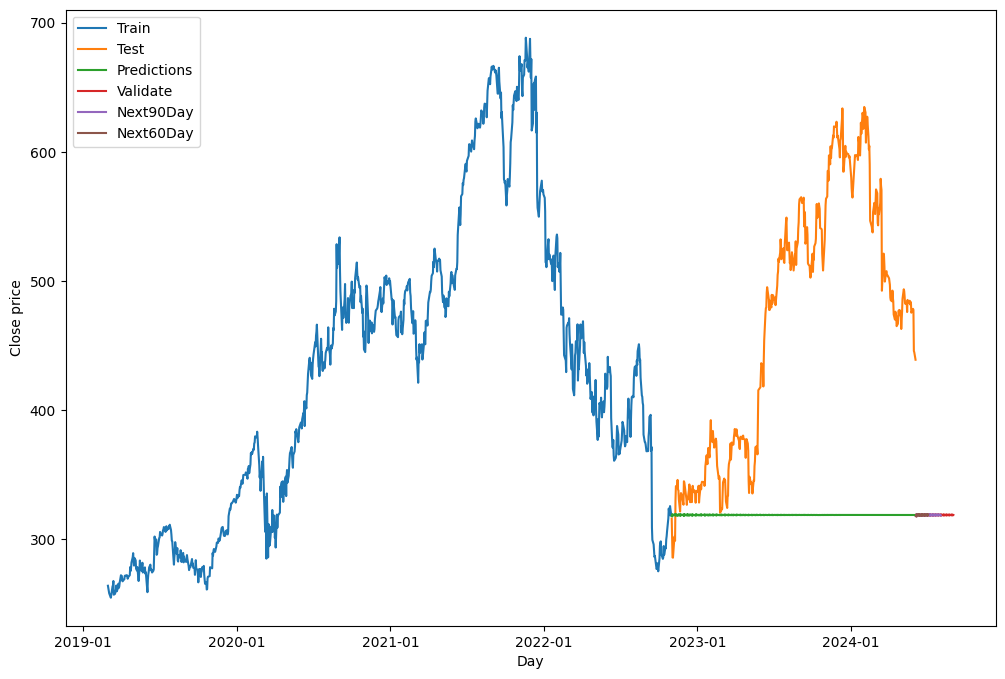

In [57]:
# 8.Vẽ hình
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][:train_size], train_data['Close'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

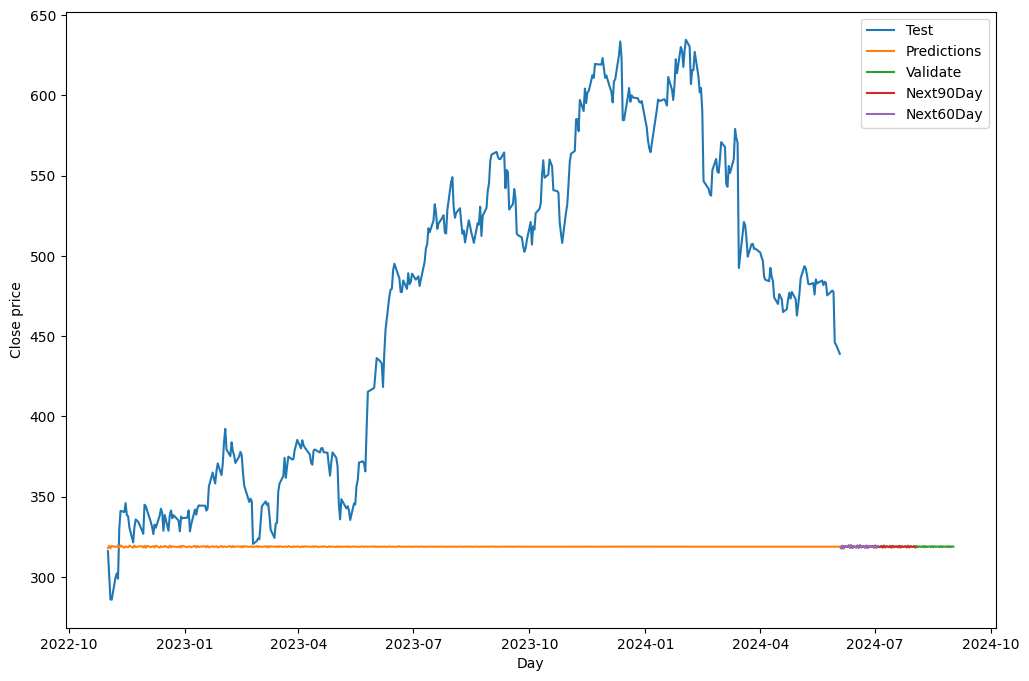

In [58]:
# 8.Vẽ hình test
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

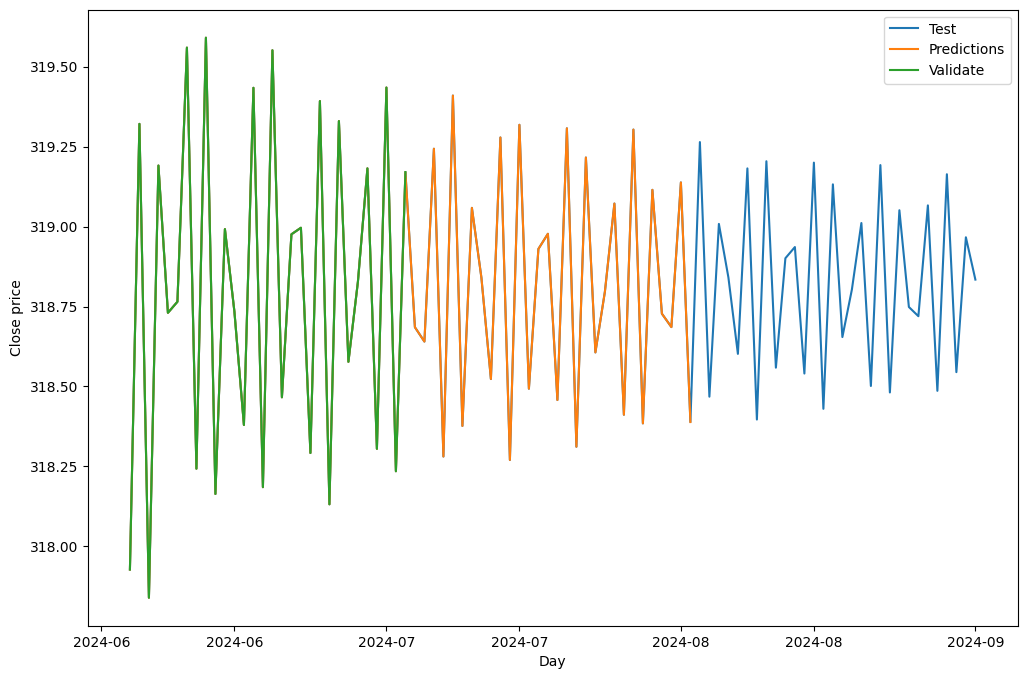

In [59]:
plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])

predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()